# Regressão Linear Múltipla

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Carregando dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/6e4f0eea-5f67-4e91-ae19-8343df190003.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.Species.nunique()

7

In [5]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
df.shape

(159, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


## Análise Exploratória dos Dados

> Como os dados se relacionam?

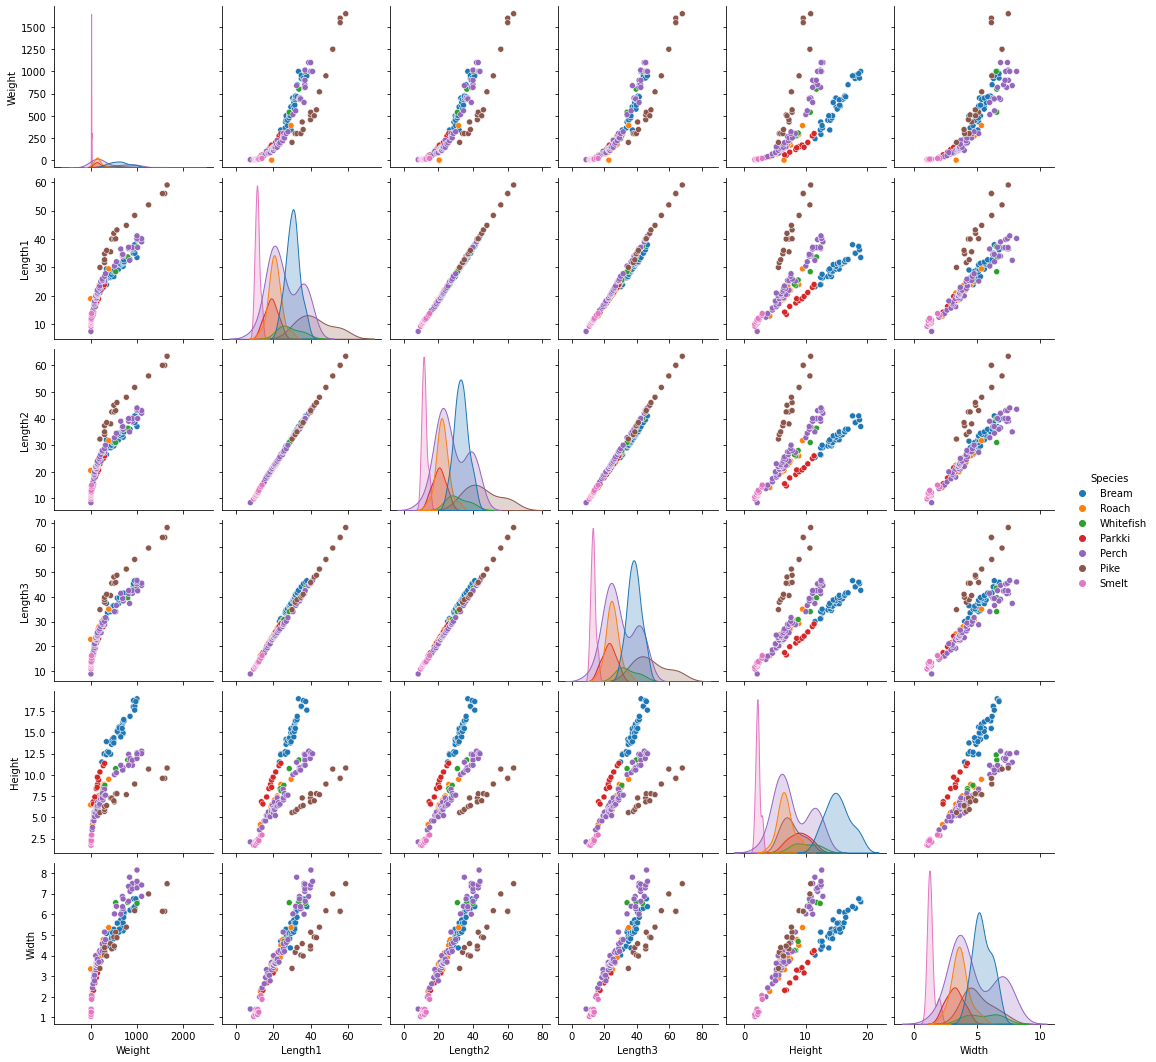

In [10]:
sns.pairplot(df, hue="Species")

In [11]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

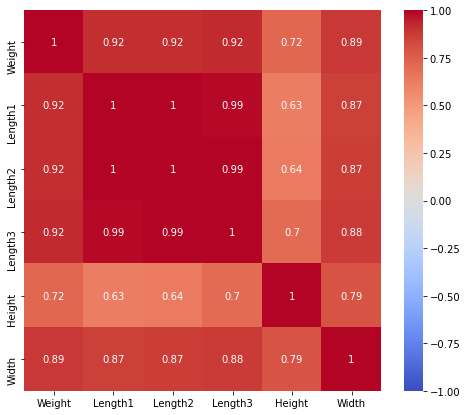

In [12]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)

## Definir a Regressão Linear Múltipla

In [13]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [14]:
# X: Length1 Length2 Length3 Height Width
# y: Weight

In [15]:
df.drop(['Species', 'Weight'], axis=1)

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [16]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']

In [17]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [18]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

---
### Scikit Learning

#### Etapas de utilização de um modelo de ML

1. Preparar o X (variáveis explicativas) e o y (variável resposta)
2. Fitar o modelo (treinar): calcular os coefientes da Regressão Linear.
3. Predizer outros valores de X, utilizando o modelo treinado.

In [19]:
lr_initial = LinearRegression().fit(X, y)

In [20]:
lr_initial.intercept_ # Intercepto ou beta_0

-499.58695535694176

In [21]:
lr_initial.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [22]:
X.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [23]:
pd.DataFrame(lr_initial.coef_.T, index=X.columns, columns=['Coeficientes'])

,Coeficientes
Length1,62.355214
Length2,-6.526752
Length3,-29.026219
Height,28.297351
Width,22.473307


#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5
$$

In [24]:
lr_initial.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

In [25]:
lr_initial.intercept_

-499.58695535694176

In [26]:
df.loc[0]

Species    Bream
Weight     242.0
Length1     23.2
Length2     25.4
Length3     30.0
Height     11.52
Width       4.02
Name: 0, dtype: object

#### Predição para todos os dados do Dataset

In [27]:
y_est = lr_initial.predict(X)

In [28]:
y_est[:5]

array([326.81612777, 369.57859339, 370.82418025, 439.05613854,
       444.16916821])

In [29]:
y[:5].values

array([242., 290., 340., 363., 430.])

In [30]:
lr_initial.score(X, y)

0.8852867046546207

In [31]:
r2_score(y, y_est)

0.8852867046546207

In [33]:
lr_initial.score(X, y)

0.8852867046546207

### Statsmodels

In [34]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

C:\Users\Fabio\python_financas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           4.95e-70
Time:                        14:13:59   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise do Erro da Regressão

In [35]:
model.resid # Mesmo que y - y_est

0      -84.816128
1      -79.578593
2      -30.824180
3      -76.056139
4      -14.169168
          ...    
154    172.808116
155    158.935439
156    150.043413
157    102.979758
158    101.905694
Length: 159, dtype: float64

#### 1. A média do erro deve ser zero

In [36]:
model.resid.mean()

-1.5951907858926124e-12

#### 2. A distribuição dos erros deve seguir uma distribuição normal

<AxesSubplot:ylabel='Count'>

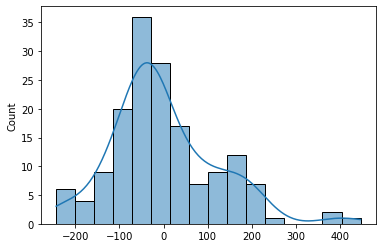

In [37]:
sns.histplot(model.resid, kde=True)

#### 3. Erro deve ser descorrelacionado

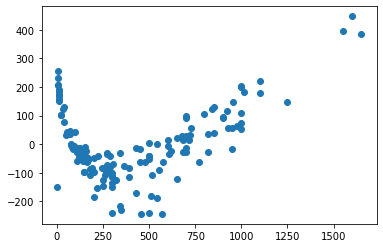

In [38]:
plt.scatter(y, model.resid)

## Removendo Outliers

<AxesSubplot:>

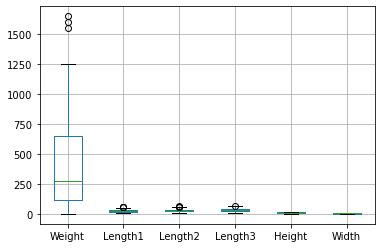

In [39]:
df.boxplot()

In [40]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

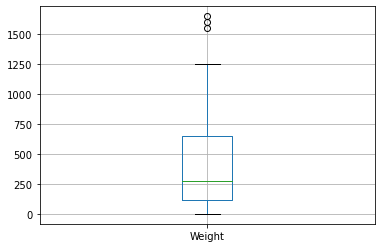

In [41]:
df[['Weight']].boxplot()

<AxesSubplot:>

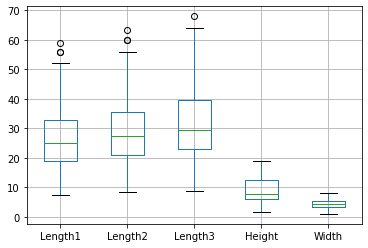

In [42]:
df.drop('Weight', axis=1).boxplot()

In [43]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [56]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) #Terceiro quartil
    
    IQR = Q3 - Q1 # Intervalo interquartílico
    
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    return inf, sup

In [57]:
# Exemplo
calc_min_and_max_range(df["Weight"])

(-607.5, 1332.5)

In [58]:
columns_to_remove_outliers = ['Weight', 'Length1', 'Length2', 'Length3']

for coluna in columns_to_remove_outliers:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

In [59]:
df.shape

(155, 7)

## Modelo de Regressão sem Outliers
---

In [60]:
df.shape

(155, 7)

In [61]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']

### Sklearn

In [62]:
lr = LinearRegression().fit(X, y)

In [63]:
lr.intercept_

-407.80289551521724

In [64]:
lr.coef_

array([117.12775535, -58.91441635, -38.83235179,  39.44185078,
        56.39736764])

In [65]:
lr.score(X, y)

0.9069290835432218

### Statsmodels

In [66]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

C:\Users\Fabio\python_financas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     290.4
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           6.45e-75
Time:                        14:51:04   Log-Likelihood:                -925.92
No. Observations:                 155   AIC:                             1864.
Df Residuals:                     149   BIC:                             1882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.8029     25.200    -16.183      0.000    -457.598    -358.008
Length1      117.1278     32.241      3.633      0.000      53.419     180.837
Length2      -58.9144     33.359     -1.766      0.079    -124.832       7.003
Length3      -38.8324     13.769     -2.820      0.005     -66.041     -11.624
Height        39.4419      7.022      5.617      0.000      25.566      53.318
Width         56.3974     16.515      3.415      0.001      23.763      89.032
==============================================================================
Omnibus:                        9.828   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.392
Skew:                           0.609   Prob(JB):                      0.00554
Kurtosis:                       2.646   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

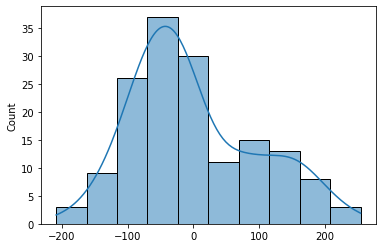

In [67]:
sns.histplot(model.resid, kde=True)

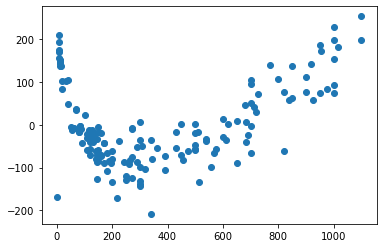

In [68]:
plt.scatter(y, model.resid)

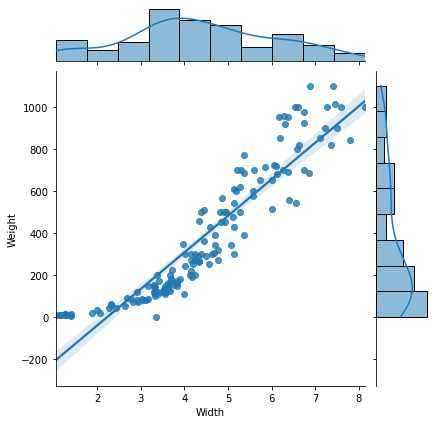

In [69]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

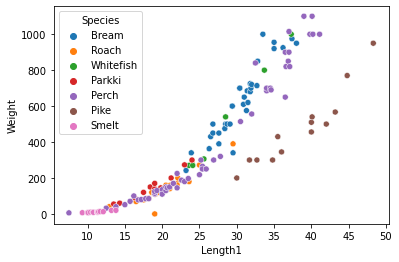

In [70]:
sns.scatterplot(data=df, x='Length1', y='Weight', hue='Species')

## Considerando os Dados Categóricos
---

In [ ]:
df.head()

In [ ]:
df.describe(include=['object'])

In [ ]:
df.Species.value_counts()

In [ ]:
pd.get_dummies(df, drop_first=True, columns=['Species']) # Pegou só a espécie através do 'columns'

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df_dummies

## Avaliando o modelo com a presença dos Dados Categóricos

### Sklearn

In [ ]:
df_dummies.head()

In [ ]:
X = df_dummies.drop('Weight', axis=1)
y = df_dummies.Weight

In [ ]:
X.head()

In [ ]:
y.head()

### LinearRegression

In [ ]:
lr = LinearRegression().fit(X, y)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(X, y)

### Statsmodels

In [ ]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

In [ ]:
model.resid

In [ ]:
sns.histplot(model.resid, kde=True)

In [ ]:
plt.scatter(y, model.resid)

### Remoção de Variáveis Desnecessárias
---

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df.corr()

In [ ]:
df_dummies.head()

In [ ]:
X = df_dummies.drop(['Weight', 'Length2', 'Length3'], axis=1)
y = df_dummies.Weight

### Sklearn

In [ ]:
lr = LinearRegression().fit(X, y)

In [ ]:
lr.intercept_

In [ ]:
lr.coef_

In [ ]:
lr.score(X, y)

### Statsmodels

In [ ]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

In [ ]:
plt.scatter(y, model.resid)

## Transformação de Variáveis
---

In [ ]:
sns.jointplot(data=df, x='Length1', y='Weight', kind='reg')

### Transformação log & Transformação log-log (duplo)

In [ ]:
sns.jointplot(x=df['Width'], y=df['Weight'], kind='reg')

In [ ]:
sns.jointplot(x=np.log(df['Width']), y=np.log(df['Weight']), kind='reg')

In [ ]:
sns.jointplot(x=np.log(df['Length1']), y=np.log(df['Weight']), kind='reg')

In [ ]:
df.Weight.all() # 'all' Vê se todos os valores não são diferentes de zero

In [ ]:
df.Width.all()

In [ ]:
df.query('Weight == 0')

In [ ]:
df_dummies.drop(40, inplace=True)

In [ ]:
sns.jointplot(x=np.log(df_dummies['Width']), y=np.log(df_dummies['Weight']), kind='reg')

In [ ]:
df_log = df_dummies.copy()

In [ ]:
df_log.columns

In [ ]:
df_log['Weight'] = np.log(df_log['Weight'])
df_log['Height'] = np.log(df_log['Height'])
df_log['Length1'] = np.log(df_log['Length1'])
df_log['Width'] = np.log(df_log['Width'])

In [ ]:
df_log.drop(['Length2', 'Length3'], axis=1, inplace=True)

In [ ]:
df_log.head()

### Separando as variáveis explicativas e a variável resposta

In [ ]:
X = df_log.drop('Weight', axis=1)
y = df_log.Weight

### Sklearn

In [ ]:
lr = LinearRegression().fit(X, y)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(X, y)

### Statsmodels

In [ ]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

In [ ]:
sns.histplot(model.resid, kde=True)

In [ ]:
plt.scatter(y, model.resid)

### Removendo as espécies

In [ ]:
df_minimal = df_log.drop('Species_Pike', axis=1)

In [ ]:
df_minimal.head()

In [ ]:
X = df_minimal.drop('Weight', axis=1)
y = df_minimal.Weight

In [ ]:
X.head()

### Sklearn

### Statsmodels

In [ ]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

In [ ]:
model.pvalues[model.pvalues > 0.05]   # pvalues = pega os p-valores

In [ ]:
df_minimal.head()

In [ ]:
X = df_minimal.drop(['Weight', 'Species_Parkki', 'Species_Roach'], axis=1)
y = df_minimal.Weight

In [ ]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

model.summary()

### Sklearn

In [ ]:
lr = LinearRegression().fit(X, y)

In [ ]:
y_pred = lr.predict(X)

In [ ]:
y_pred[:5]

In [ ]:
df.Weight[:5]

In [ ]:
np.exp(y_pred[:5])

In [ ]:
X = df.drop(['Weight', 'Species'], axis=1)

In [ ]:
y_pred_initial = lr_initial.predict(X)

y_pred_initial[:5]

## Na prática
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo (validação)

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

In [ ]:
X_final = df_minimal.drop(['Weight', 'Species_Parkki', 'Species_Roach'], axis=1)
y_final = df_minimal.Weight

In [ ]:
from sklearn.model_selection import train_test_split

---

In [ ]:
a, b = 10, 20

In [ ]:
a,b

In [ ]:
a, b = [1, 2]

print(a, b)

In [ ]:
a, b = {5, 6}

print(a, b)

---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

In [ ]:
X_final.shape

In [ ]:
X_test.shape

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = np.exp(lr.predict(X_test))

In [ ]:
r2_score(np.exp(y_test), y_pred)

In [ ]:
lr.score(X_train, y_train)